In [1]:
#Import Libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:/data science/capstone Projects/Additional projects/Car Price/car_price_prediction.csv')
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.shape

(19237, 18)

In our dataset we have 19237 rows (record) and 18 columns (features). The price column is the target variable and the remaining are the feature variables based on which we will predict the value of a car.

In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


This provides the summary statistics for all numerical variables in the dataset.

In [5]:
df.describe(include='object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


This provides the summary statistics for all categorical variables in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

This gives null / not-null count and data types for every column.As from the above we can conclude that we have different data type but largely categorical.

In [7]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

This describes number of unique values per column.

## Data Cleaning

In [8]:
duplicates = df.duplicated()
duplicates.sum()
df = df.drop_duplicates()
df.shape

(18924, 18)

The above code find number of duplicates and removes them. After removing the duplicates we have 18924 records.

In [9]:
df = df.drop(['ID'],axis=1)

Dropping the unnecessary column 'ID'.

In [10]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


***Column wise analysis and cleaning***

*Find the unique values for every column and  convert the necessary columns into float.*

**Mileage column.**

In [11]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [12]:
df['Mileage'] = df['Mileage'].str.split(' ').str[0].astype(float)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


**Levy column**

In [13]:
df['Levy']=df['Levy'].replace('-',0).astype(float)
df['Levy']=round(df['Levy'].replace(0,df['Levy'].mean()))
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,633.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


**Doors column.**

In [14]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [15]:
df['Doors'] = np.where((df['Doors'] == '04-May') | (df['Doors'] == '02-Mar'), df['Doors'].str.split('-').str[0], df['Doors'] )
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,8467,633.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


**Engine column.**

In [16]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [17]:
df['Engine volume'] = df['Engine volume'].str.split(' ').str[0].astype(float)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,8467,633.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


> **Exploratory Data Analysis**

***Handling Missing values***

In [18]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

There are no missing values in the dataset.

***Handling Outliers***

In [19]:
#Finding the 25th percentile and 75th percentiles.
Q1 = df.quantile(0.25)             
Q3 = df.quantile(0.75)

#Inter Quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1                          

#Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_limit=Q1-1.5*IQR                        
upper_limit=Q3+1.5*IQR

((df.select_dtypes(include=['float64','int64'])<lower_limit) | (df.select_dtypes(include=['float64','int64'])>upper_limit)).sum()

Price            1055
Levy             1561
Prod. year        962
Engine volume    1358
Mileage           635
Cylinders        4765
Airbags             0
dtype: int64

Finding the sum of the outliers in each numerical column.

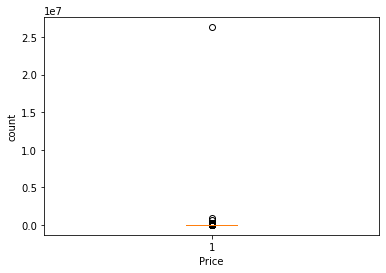

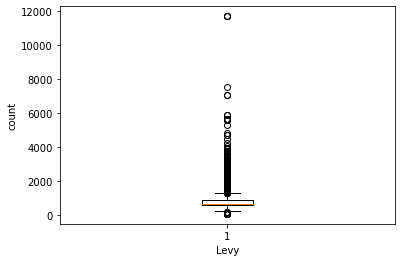

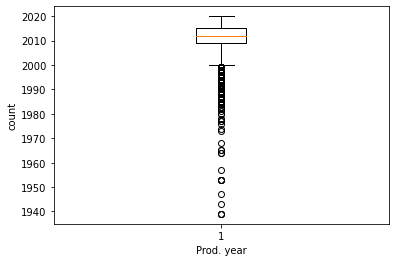

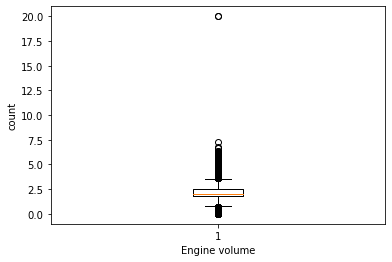

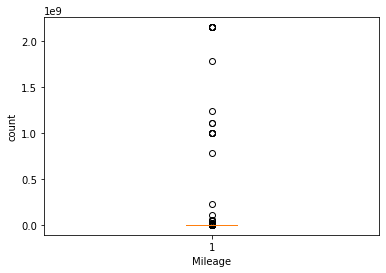

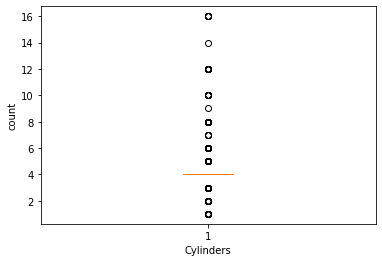

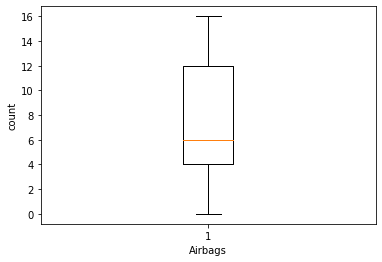

In [20]:
for col_name in df:
    if (df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])# making boxplot for all the columns except buy to check for outliers
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

Displayed boxplot for every column.

In [21]:
#displaying IQR values
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Price             16732.0
Levy                284.0
Prod. year            6.0
Engine volume         0.7
Mileage          118924.0
Cylinders             0.0
Airbags               8.0
dtype: float64


*Removing the outliers*

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 
df.shape

(12081, 17)

The number of records reduced from 18924 to 12081 from outlier removal.

***Creation of Correlation matrix***

<AxesSubplot:>

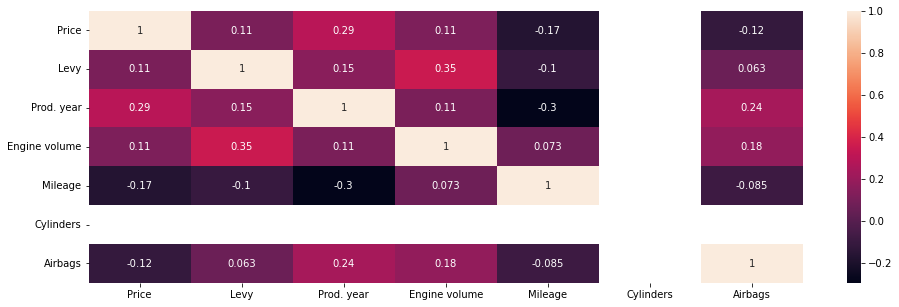

In [25]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), cbar=True, annot=True)

According to the correlation matrix, we can see that no such column is that highly corelated with each other.

***Data Visualization***

*Categorical Data*

<AxesSubplot:title={'center':'Color vs Price'}, xlabel='Color', ylabel='Price'>

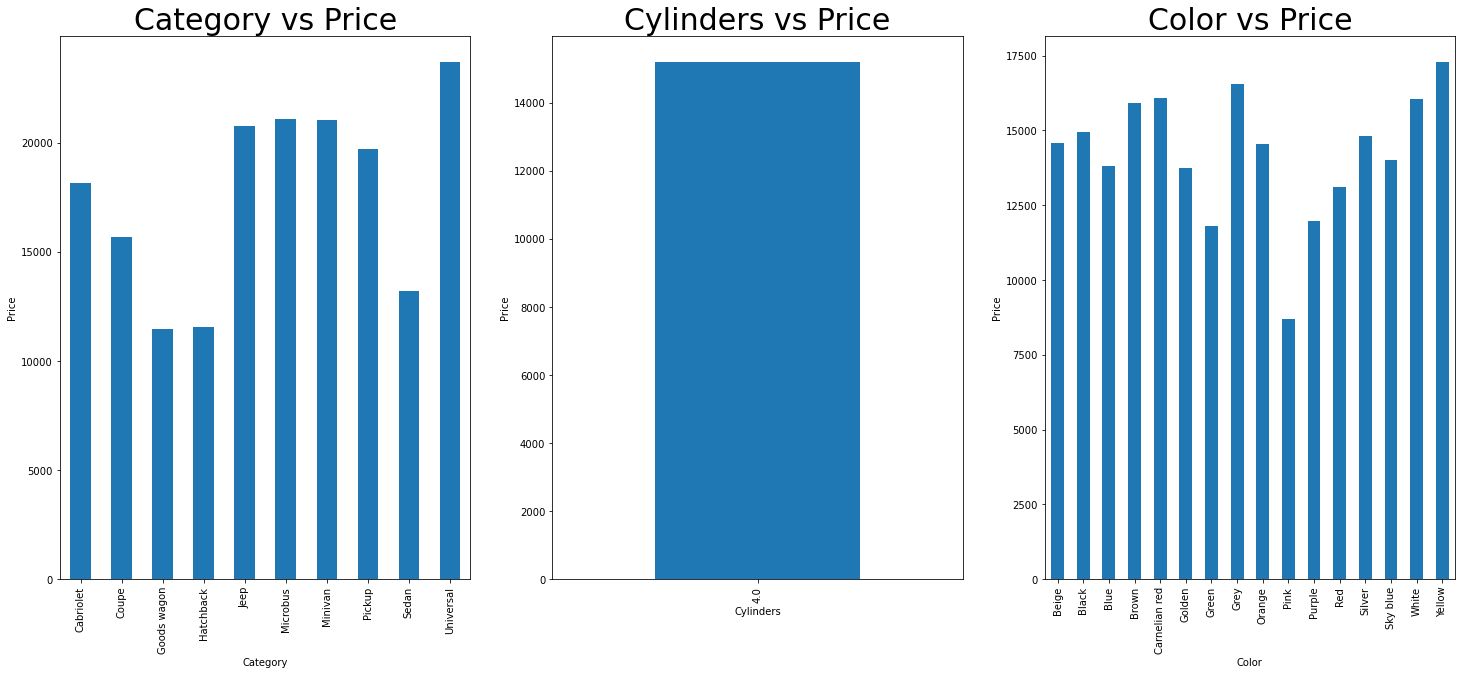

In [26]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Category vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Category')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Cylinders vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Cylinders')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Color vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Color')['Price'].mean().plot.bar()


<AxesSubplot:title={'center':'Fuel type vs Price'}, xlabel='Fuel type', ylabel='Price'>

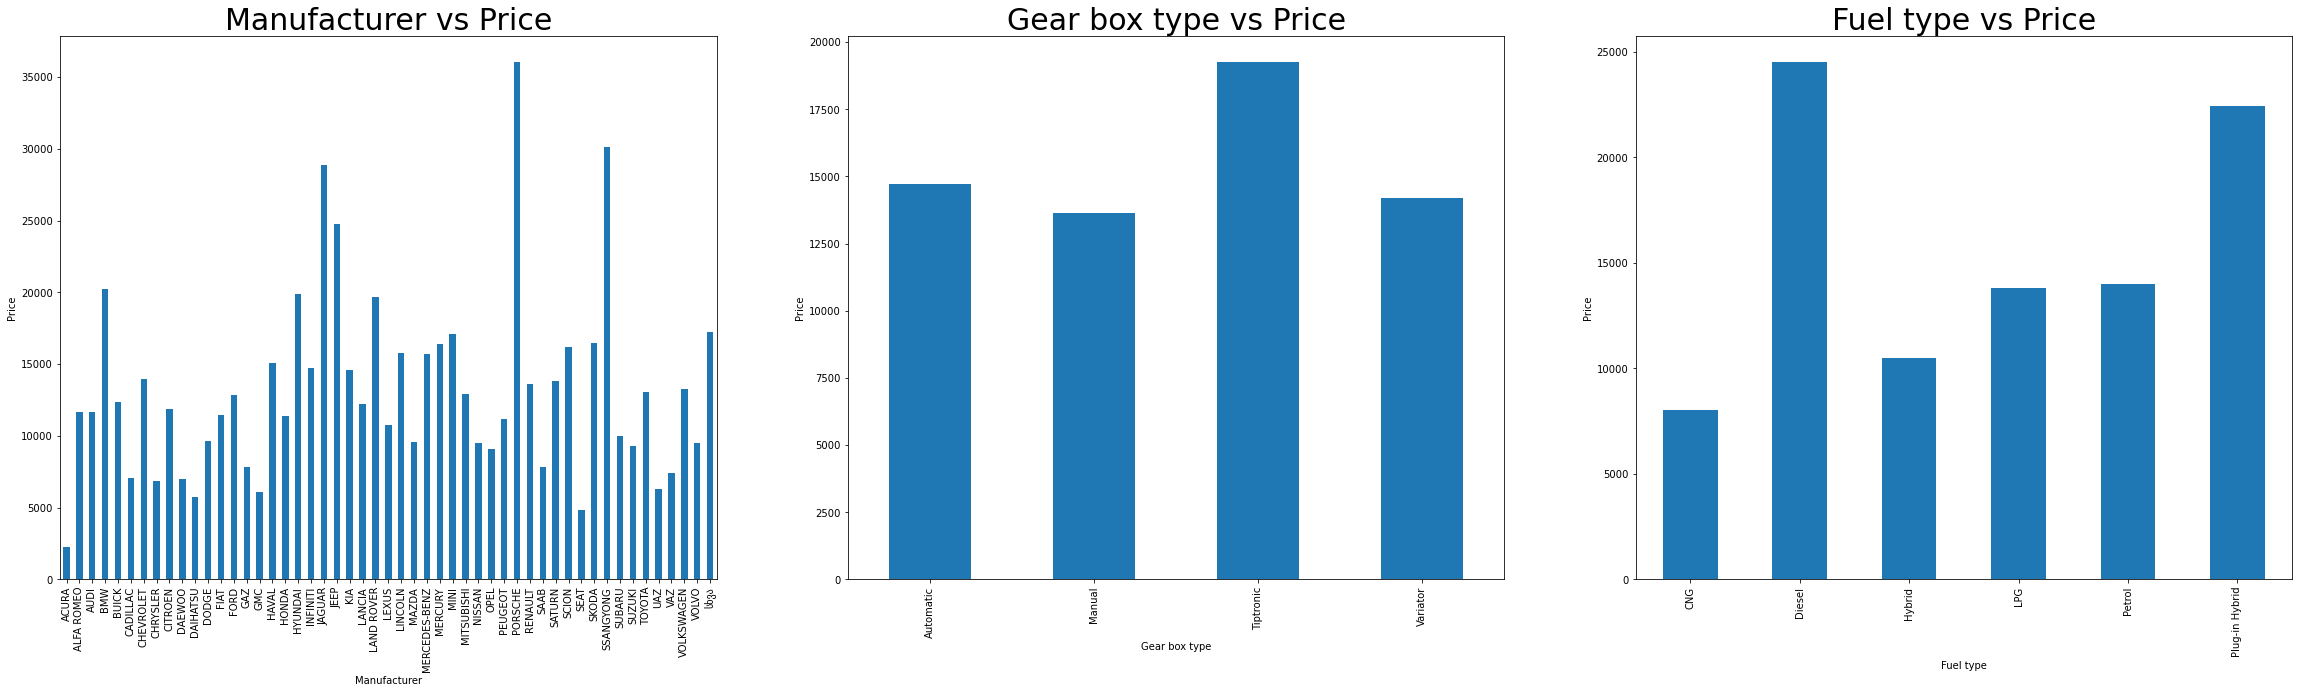

In [27]:
plt.figure(figsize=(40,10))
plt.subplot(131)
plt.title('Manufacturer vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Manufacturer')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Gear box type vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Gear box type')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Fuel type vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Fuel type')['Price'].mean().plot.bar()

*Numerical Data*

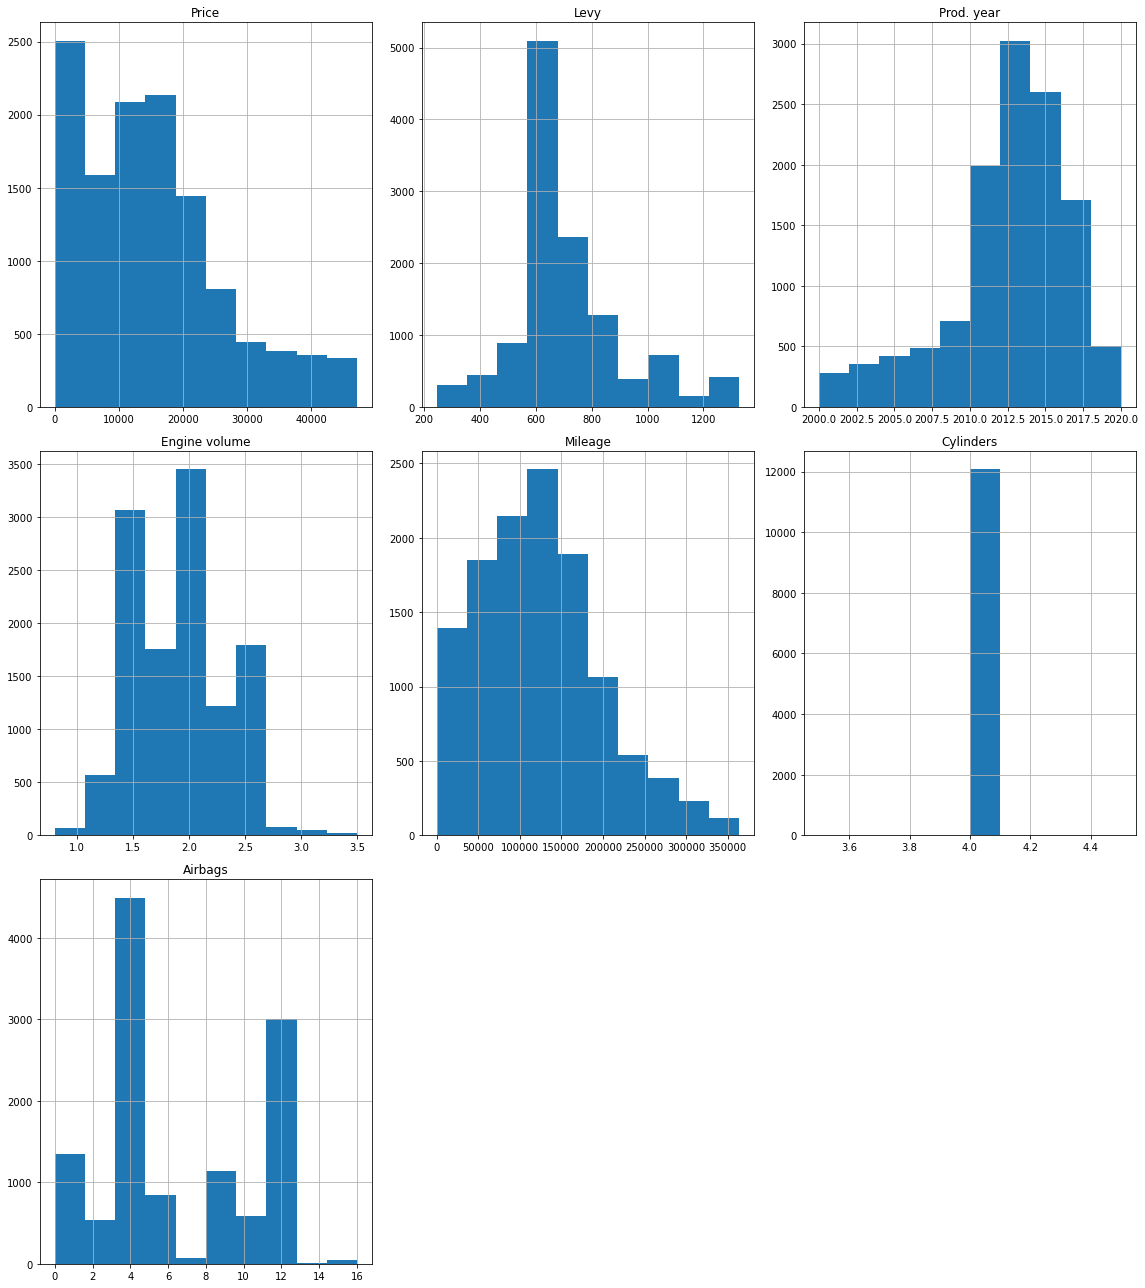

In [28]:
df.hist(figsize = (16,18))
plt.tight_layout()
plt.show()

*Handling Categorical variables - convert into one-hot encoding*

In [29]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BMW,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
2,8467,633.0,2006,1.3,200000.0,4.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.0,2011,2.5,168966.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.0,2014,1.3,91901.0,4.0,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,39493,891.0,2016,2.0,160931.0,4.0,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1803,761.0,2010,1.8,258909.0,4.0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
df.reset_index(drop=True, inplace=True)
df.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BMW,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,8467,633.0,2006,1.3,200000.0,4.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3607,862.0,2011,2.5,168966.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11726,446.0,2014,1.3,91901.0,4.0,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,39493,891.0,2016,2.0,160931.0,4.0,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1803,761.0,2010,1.8,258909.0,4.0,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0


*Handling numerical columns - Standarization*

In [31]:
from sklearn.preprocessing import StandardScaler
col_list = ['Levy','Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags']
scaler = StandardScaler()
df[col_list] = scaler.fit_transform(df[col_list])
df.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BMW,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,8467,-0.420859,-1.519849,-1.621449,1.036882,0.0,-1.063292,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3607,0.738645,-0.265953,1.460316,0.616348,0.0,-1.553171,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11726,-1.367703,0.486384,-1.621449,-0.427941,0.0,-0.573412,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,39493,0.885482,0.987942,0.176247,0.507468,0.0,-0.573412,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1803,0.227248,-0.516732,-0.337380,1.835144,0.0,1.386107,0,0,0,...,0,0,0,0,0,0,0,0,1,0


> **Model Building**

*Splitting Data as features and Target variables.*

In [32]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

*Independent Features*

In [33]:
X.head()

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BMW,Manufacturer_BUICK,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,-0.420859,-1.519849,-1.621449,1.036882,0.0,-1.063292,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.738645,-0.265953,1.460316,0.616348,0.0,-1.553171,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.367703,0.486384,-1.621449,-0.427941,0.0,-0.573412,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.885482,0.987942,0.176247,0.507468,0.0,-0.573412,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.227248,-0.516732,-0.337380,1.835144,0.0,1.386107,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


*Target Variable*

In [34]:
y.head()

0     8467
1     3607
2    11726
3    39493
4     1803
Name: Price, dtype: int64

***Linear Regression***

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

from sklearn.linear_model import LinearRegression


# create instance of the model and storing it to variable linear_model
Linear_model = LinearRegression()
# fit this into xtrain and y train to create the model
Linear_model.fit(X_train,y_train)

# next predict the values in the x test using this model created
# and storing those values to variable y_pred
lr_pred = Linear_model.predict(X_test)

print("Training Score using LR:",Linear_model.score(X_train,y_train))
print("Testing Score using LR:",Linear_model.score(X_test,y_test))

Training Score using LR: 0.5777298293332473
Testing Score using LR: -7.607395003936157e+21


***Random Forest Regressor***

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [42]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Training Score:",model.score(X_train,y_train))
print("Testing Score:",model.score(X_test,y_test))

Training Score: 0.9653897597413889
Testing Score: 0.7778958025368118


***Random Forest Regressor - Hyperparameter Tuning***

Using Randomized search cv for selecting best parameters.

In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [44]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [46]:
rf_model = RandomForestRegressor()

In [47]:
rf_random_model = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring=None,n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [48]:
rf_random_model.fit(X_train,y_train)
y_predict=rf_random_model.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  13.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  25.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  25.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

In [49]:
print("Training Score After hyperparamter:",rf_random_model.score(X_train,y_train))
print("Testing Score After hyperparamter:",rf_random_model.score(X_test,y_test))

Training Score After hyperparamter: 0.8890395496909735
Testing Score After hyperparamter: 0.7649639678596258
